In [141]:
import numpy as np
import pygimli as pg
import pygimli.meshtools as mt
from pygimli.physics import ert

In [ ]:
size2 = 2000
world = mt.createWorld(start=[-size2, -size2, -size2], end=[size2, size2, 0])
blen = 44
dz = 0.1
zvec = np.arange(0, blen+dz*0.01, dz)
nodes = [world.createNode([0, 0, -z], marker=-10000) for z in zvec]
for i in range(len(nodes)-1):
    world.createEdge(nodes[i], nodes[i+1])

world.createNode([size2, 0, 0], marker=-999)
world.createNode([-size2, 0, 0], marker=-1000)
zvec2 = np.arange(0, blen+16.1, dz)
obsp = [world.createNode([1, 0, -z]) for z in zvec2]
print(world)

Mesh: Nodes: 1052 Cells: 0 Boundaries: 446


In [143]:
mesh = mt.createMesh(world, quality=1.3)
mesh = mesh.createP2()
print(mesh)

Mesh: Nodes: 109954 Cells: 81860 Boundaries: 164115


In [144]:
pos = pg.PosVector()
for n in obsp:
    pos.push_back(n.pos())

In [145]:
scheme = ert.DataContainer()
scheme.createSensor([0, 0, 0])
scheme.createSensor([1, 0, 0])
scheme.createFourPointData(i, 0, 1, -1, -1)
res = 100
u = ert.simulate(mesh=mesh, scheme=scheme, res=res, returnFields=True, calcOnly=True, sr=False)[0]

In [146]:
E = -pg.solver.grad(mesh, u)
jx = pg.interpolate(mesh, pg.x(E), pos) / res
uz = pg.interpolate(mesh, u, pos)

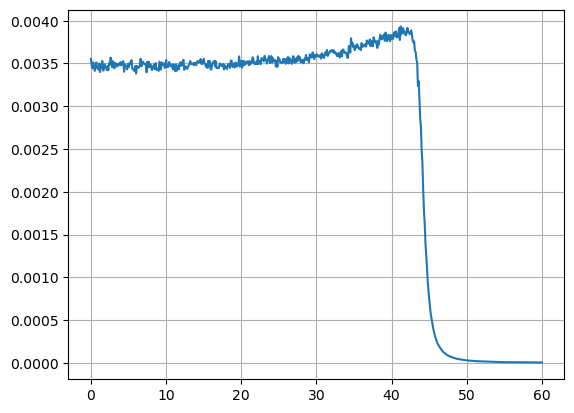

In [147]:
pg.plt.plot(zvec2, jx)
pg.plt.grid()